# Anomoly Detection Using Machhine Learning

__Anamoly :__

- Uncertainity 

- Outlier detection 

- Novelty detection (Something new)

- Unusual pattern 

- Inconsistent data points


Time Series Anamoly detection

Video level amanoly detection

Image level anamoly detection
  
  - Out of Distribution (OOD) Detection target
  
  - Anamoly segmentation target
  
  
__PyOD__ python toolkit for detecting outlying objects in multivariate data (Since May 2018)





## Benchmark 

__Linear model for Outlier detection__

- __PCA: Principal component analysis__: Use sum of weighted projected distance to the eigenvector hyperplane as the outlier scores

- __MCD: Minimum co-variance determinent__: minimum diff between SD & each data points.

- __OCSVM: One class- Support Vector machine__: both for Classification | Regression problems. 
   
   OCSVM Not suggested for Non Linear data 

__Proximity based outlier detection Models__: 

- __LOC:__ Local outlier Factor 

- __CBLOF:__ Cluster based local outlier factor

- __KNN: k Nearest Neighbours:__ based on distance to the kth nearest neighbour as the outlier score

- __HBOS:__ Histogram based Outlier Score

__Probabilistic Model:__

- __ABOD__ Angle Based Outlier detection

__Outlier Ensembles & combination Frameworks__: optimisation

- __Isolation Forest__

- __Feature Bagging__

# Part - 1

## Import packages

In [28]:
import os
import sys # to Load our files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn .model_selection import train_test_split # to split the dataset
from scipy.io import loadmat # to load matlab files


## Import PyOD packages & methods

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from pyod.models.pca import PCA       # Principal component analysis
from pyod.models.mcd import MCD       # Minimum co-variance determinent
from pyod.models.ocsvm import OCSVM   # One class- Support Vector machine
from pyod.models.lof import LOF       # Local outlier Factor
from pyod.models.cblof import CBLOF   # Cluster based local outlier factor
from pyod.models.knn import KNN       # k Nearest Neighbours
from pyod.models.hbos import HBOS     # Histogram based Outlier Score
from pyod.models.abod import ABOD     # Angle based outlier detection
from pyod.models.iforest import IForest 
from pyod.models.feature_bagging import FeatureBagging 

## import performance Metric Package

In [3]:
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score # to evaluate classification model performane

## Defining the file & read X, Y

In [4]:
mat_file_list=['arrhythmia.mat',
 'cardio.mat',
 'glass.mat',
 'ionosphere.mat',
 'letter.mat',
 'lympho.mat',
 'mnist.mat',
 'musk.mat',
 'optdigits.mat',
 'pendigits.mat',
 'pima.mat',
 'satellite.mat',
 'satimage-2.mat',
 'shuttle.mat',
 'shuttle.mat',
 'vertebral.mat',
 'vowels.mat',
 'wbc.mat'] #all thedata set files in .mat format

In [5]:
mat_file_list

['arrhythmia.mat',
 'cardio.mat',
 'glass.mat',
 'ionosphere.mat',
 'letter.mat',
 'lympho.mat',
 'mnist.mat',
 'musk.mat',
 'optdigits.mat',
 'pendigits.mat',
 'pima.mat',
 'satellite.mat',
 'satimage-2.mat',
 'shuttle.mat',
 'shuttle.mat',
 'vertebral.mat',
 'vowels.mat',
 'wbc.mat']

In [7]:
data = loadmat('matfiles/cardio.mat')
data # X are inputs & Y are outputs

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 3.8.0, 2014-12-18 10:48:09 UTC',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 0.00491231,  0.69319077, -0.20364049, ...,  0.23149795,
         -0.28978574, -0.49329397],
        [ 0.11072935, -0.07990259, -0.20364049, ...,  0.09356344,
         -0.25638541, -0.49329397],
        [ 0.21654639, -0.27244466, -0.20364049, ...,  0.02459619,
         -0.25638541,  1.14001753],
        ...,
        [-0.41835583, -0.91998844, -0.16463485, ..., -1.49268341,
          0.24461959, -0.49329397],
        [-0.41835583, -0.91998844, -0.15093411, ..., -1.42371616,
          0.14441859, -0.49329397],
        [-0.41835583, -0.91998844, -0.20364049, ..., -1.28578165,
          3.58465295, -0.49329397]]),
 'y': array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])}

In [8]:
len(data)

5

In [9]:
data.keys() # __means predefined__

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [10]:
data.values()

dict_values([b'MATLAB 5.0 MAT-file, written by Octave 3.8.0, 2014-12-18 10:48:09 UTC', '1.0', [], array([[ 0.00491231,  0.69319077, -0.20364049, ...,  0.23149795,
        -0.28978574, -0.49329397],
       [ 0.11072935, -0.07990259, -0.20364049, ...,  0.09356344,
        -0.25638541, -0.49329397],
       [ 0.21654639, -0.27244466, -0.20364049, ...,  0.02459619,
        -0.25638541,  1.14001753],
       ...,
       [-0.41835583, -0.91998844, -0.16463485, ..., -1.49268341,
         0.24461959, -0.49329397],
       [-0.41835583, -0.91998844, -0.15093411, ..., -1.42371616,
         0.14441859, -0.49329397],
       [-0.41835583, -0.91998844, -0.20364049, ..., -1.28578165,
         3.58465295, -0.49329397]]), array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])])

### Input feature shape in Mat Files

In [11]:
type(data['X']), data['X'].shape # Input (Independent)

(numpy.ndarray, (1831, 21))

### output feature shape in Mat Files

In [12]:
type(data['y']), data['y'].shape #output(Target)in single dimension

(numpy.ndarray, (1831, 1))

In [13]:
df_columns = ['Data','#Sample','#Dimensions','Outlier Perc','PCA','MCD','OCSVM','LOF','CBLOF','KNN','HBOS','ABOD','IFOREST',
              'FEATUREBAGGING'] #creating dataframe for column names


### ROC Performance evolution table

__Region of Charecteristics | area under curve__

In [14]:
roc_df = pd.DataFrame(columns=df_columns) 
roc_df #empty dataframe with column names

,Data,#Sample,#Dimensions,Outlier Perc,PCA,MCD,OCSVM,LOF,CBLOF,KNN,HBOS,ABOD,IFOREST,FEATUREBAGGING


### precision_n_scores Performance evolution table

In [15]:
prn_df = pd.DataFrame(columns=df_columns)
prn_df

,Data,#Sample,#Dimensions,Outlier Perc,PCA,MCD,OCSVM,LOF,CBLOF,KNN,HBOS,ABOD,IFOREST,FEATUREBAGGING


### time difference Performance evolution table

In [16]:
time_df = pd.DataFrame(columns=df_columns)

# Exploring .mat files

In [17]:
from time import time
random_state = np.random.RandomState(42)

for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('matfiles', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

   # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

   # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                       random_state=random_state)

   # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    classifiers = {'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
                   'Cluster-based Local Outlier Factor': CBLOF(
                       contamination=outliers_fraction, check_estimator=False,
                       random_state=random_state),
                   'Feature Bagging': FeatureBagging(contamination=outliers_fraction,
                                         random_state=random_state),
                   'Histogram-base Outlier Detection (HBOS)': HBOS(
                       contamination=outliers_fraction),
                   'Isolation Forest': IForest(contamination=outliers_fraction,
                                               random_state=random_state),
                   'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
                   'Local Outlier Factor (LOF)': LOF(contamination=outliers_fraction),
                   'Minimum Covariance Determinant (MCD)': MCD(contamination=outliers_fraction, random_state=random_state),
                   'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
                   'Principal Component Analysis (PCA)': PCA(contamination=outliers_fraction, random_state=random_state),
                  }
    

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train_norm)
        test_scores = clf.decision_function(X_test_norm)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        time_list.append(duration)

        roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
        prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

        print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
              'execution time: {duration}s'.format(
                  clf_name=clf_name, roc=roc, prn=prn, duration=duration))

        roc_list.append(roc)
        prn_list.append(prn)

    temp_df = pd.DataFrame(time_list).transpose()
    temp_df.columns = df_columns
    time_df = pd.concat([time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns
    prn_df = pd.concat([prn_df, temp_df], axis=0)




... Processing arrhythmia.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.7687, precision @ rank n:0.3571, execution time: 3.4042s
Cluster-based Local Outlier Factor ROC:0.7684, precision @ rank n:0.4643, execution time: 2.3015s
Feature Bagging ROC:0.7799, precision @ rank n:0.5, execution time: 0.6669s
Histogram-base Outlier Detection (HBOS) ROC:0.8511, precision @ rank n:0.5714, execution time: 2.0997s
Isolation Forest ROC:0.8527, precision @ rank n:0.5714, execution time: 0.6157s
K Nearest Neighbors (KNN) ROC:0.782, precision @ rank n:0.5, execution time: 0.1089s
Local Outlier Factor (LOF) ROC:0.7787, precision @ rank n:0.4643, execution time: 0.0837s


C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


Minimum Covariance Determinant (MCD) ROC:0.8228, precision @ rank n:0.4286, execution time: 2.5976s
One-class SVM (OCSVM) ROC:0.7986, precision @ rank n:0.5, execution time: 0.0696s
Principal Component Analysis (PCA) ROC:0.7997, precision @ rank n:0.5, execution time: 0.1228s

... Processing cardio.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.5763, precision @ rank n:0.1875, execution time: 0.5179s
Cluster-based Local Outlier Factor ROC:0.8221, precision @ rank n:0.4844, execution time: 0.1855s
Feature Bagging ROC:0.4879, precision @ rank n:0.1406, execution time: 0.8538s
Histogram-base Outlier Detection (HBOS) ROC:0.8453, precision @ rank n:0.4688, execution time: 0.0075s
Isolation Forest ROC:0.9414, precision @ rank n:0.5, execution time: 0.5225s
K Nearest Neighbors (KNN) ROC:0.6959, precision @ rank n:0.2812, execution time: 0.1707s
Local Outlier Factor (LOF) ROC:0.4715, precision @ rank n:0.125, execution time: 0.115s


C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


Minimum Covariance Determinant (MCD) ROC:0.8778, precision @ rank n:0.3906, execution time: 1.1933s
One-class SVM (OCSVM) ROC:0.9507, precision @ rank n:0.5938, execution time: 0.0818s
Principal Component Analysis (PCA) ROC:0.9638, precision @ rank n:0.6875, execution time: 0.01s

... Processing glass.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.7104, precision @ rank n:0.25, execution time: 0.0509s
Cluster-based Local Outlier Factor ROC:0.8506, precision @ rank n:0.25, execution time: 0.0628s
Feature Bagging ROC:0.7043, precision @ rank n:0.25, execution time: 0.0429s
Histogram-base Outlier Detection (HBOS) ROC:0.6524, precision @ rank n:0.0, execution time: 0.002s
Isolation Forest ROC:0.7195, precision @ rank n:0.25, execution time: 0.3502s
K Nearest Neighbors (KNN) ROC:0.7805, precision @ rank n:0.25, execution time: 0.0136s
Local Outlier Factor (LOF) ROC:0.7774, precision @ rank n:0.25, execution time: 0.002s
Minimum Covariance Determinant (MCD) ROC:0.7165, precision @ rank n:

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-380.733523356668684 > -520.529171150752177). You may want to try with a higher value of support_fraction (current value: 0.614).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-197.224339606050478 > -526.499524761035786). You may want to try with a higher value of support_fraction (current value: 0.614).
  RuntimeWarning)


Angle-based Outlier Detector (ABOD) ROC:0.7813, precision @ rank n:0.3562, execution time: 8.7243s
Cluster-based Local Outlier Factor ROC:0.8447, precision @ rank n:0.4007, execution time: 1.25s
Feature Bagging ROC:0.7259, precision @ rank n:0.3664, execution time: 64.7631s
Histogram-base Outlier Detection (HBOS) ROC:0.5675, precision @ rank n:0.1199, execution time: 0.0639s
Isolation Forest ROC:0.7801, precision @ rank n:0.2979, execution time: 2.825s
K Nearest Neighbors (KNN) ROC:0.8409, precision @ rank n:0.4144, execution time: 8.3742s
Local Outlier Factor (LOF) ROC:0.7085, precision @ rank n:0.339, execution time: 8.1448s


C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


Minimum Covariance Determinant (MCD) ROC:0.863, precision @ rank n:0.3973, execution time: 11.6545s
One-class SVM (OCSVM) ROC:0.8417, precision @ rank n:0.3801, execution time: 5.9071s
Principal Component Analysis (PCA) ROC:0.8396, precision @ rank n:0.3767, execution time: 0.2032s

... Processing musk.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.0809, precision @ rank n:0.0333, execution time: 2.8778s
Cluster-based Local Outlier Factor ROC:1.0, precision @ rank n:1.0, execution time: 0.5037s
Feature Bagging ROC:0.5228, precision @ rank n:0.1667, execution time: 17.362s
Histogram-base Outlier Detection (HBOS) ROC:0.9999, precision @ rank n:0.9667, execution time: 0.0802s
Isolation Forest ROC:0.9996, precision @ rank n:0.9333, execution time: 1.863s
K Nearest Neighbors (KNN) ROC:0.7348, precision @ rank n:0.2333, execution time: 2.4245s
Local Outlier Factor (LOF) ROC:0.5323, precision @ rank n:0.1333, execution time: 2.3156s
Minimum Covariance Determinant (MCD) ROC:1.0, precision @

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


Minimum Covariance Determinant (MCD) ROC:0.3486, precision @ rank n:0.0, execution time: 4.3537s
One-class SVM (OCSVM) ROC:0.4972, precision @ rank n:0.0, execution time: 1.6689s
Principal Component Analysis (PCA) ROC:0.504, precision @ rank n:0.0, execution time: 0.0688s

... Processing pendigits.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.7008, precision @ rank n:0.0308, execution time: 1.74s
Cluster-based Local Outlier Factor ROC:0.9609, precision @ rank n:0.3077, execution time: 0.3378s
Feature Bagging ROC:0.4687, precision @ rank n:0.0462, execution time: 5.0302s
Histogram-base Outlier Detection (HBOS) ROC:0.9294, precision @ rank n:0.2615, execution time: 0.009s
Isolation Forest ROC:0.9422, precision @ rank n:0.2769, execution time: 0.8269s
K Nearest Neighbors (KNN) ROC:0.7602, precision @ rank n:0.0462, execution time: 0.7133s
Local Outlier Factor (LOF) ROC:0.481, precision @ rank n:0.0462, execution time: 0.6181s
Minimum Covariance Determinant (MCD) ROC:0.8271, precision 

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.151703434780714 > -77.037654394061022). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-50.236579805297737 > -77.094762844631418). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-50.127165967938055 > -76.678332134420899). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarn

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-50.246740593074605 > -76.707091612065540). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-50.256978425484228 > -76.759605710076954). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-50.288199308055539 > -75.494177850321933). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarn

Minimum Covariance Determinant (MCD) ROC:0.9903, precision @ rank n:0.7534, execution time: 16.9995s
One-class SVM (OCSVM) ROC:0.9922, precision @ rank n:0.9553, execution time: 52.6499s
Principal Component Analysis (PCA) ROC:0.9902, precision @ rank n:0.9503, execution time: 0.0439s

... Processing shuttle.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.6227, precision @ rank n:0.1938, execution time: 17.3624s
Cluster-based Local Outlier Factor ROC:0.6578, precision @ rank n:0.2206, execution time: 1.1843s
Feature Bagging ROC:0.5023, precision @ rank n:0.0669, execution time: 63.9915s
Histogram-base Outlier Detection (HBOS) ROC:0.9868, precision @ rank n:0.9386, execution time: 0.0217s
Isolation Forest ROC:0.9974, precision @ rank n:0.9486, execution time: 4.112s
K Nearest Neighbors (KNN) ROC:0.6549, precision @ rank n:0.2213, execution time: 10.3378s
Local Outlier Factor (LOF) ROC:0.5336, precision @ rank n:0.155, execution time: 14.1295s


C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.467139923875983 > -104.137452055198153). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.564705869881067 > -74.830072329633438). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.052965351125515 > -76.277258551336104). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWar

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.490035891429962 > -75.508957187328363). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.544188199759361 > -75.766769691299572). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.245604097561682 > -75.579155700702046). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarn

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.835499092286724 > -75.870481934565888). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.863734370680085 > -77.254181479277918). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\GV62 7RD\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-48.807030513252812 > -74.772897393657658). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarn

Minimum Covariance Determinant (MCD) ROC:0.9897, precision @ rank n:0.7477, execution time: 15.0039s
One-class SVM (OCSVM) ROC:0.9923, precision @ rank n:0.9605, execution time: 51.7125s
Principal Component Analysis (PCA) ROC:0.9907, precision @ rank n:0.9577, execution time: 0.0384s

... Processing vertebral.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.3688, precision @ rank n:0.0, execution time: 0.0456s
Cluster-based Local Outlier Factor ROC:0.3891, precision @ rank n:0.0, execution time: 0.0617s
Feature Bagging ROC:0.3688, precision @ rank n:0.0, execution time: 0.043s
Histogram-base Outlier Detection (HBOS) ROC:0.3617, precision @ rank n:0.0, execution time: 0.002s
Isolation Forest ROC:0.3539, precision @ rank n:0.0, execution time: 0.3364s
K Nearest Neighbors (KNN) ROC:0.3562, precision @ rank n:0.0, execution time: 0.0119s
Local Outlier Factor (LOF) ROC:0.3562, precision @ rank n:0.0, execution time: 0.0067s
Minimum Covariance Determinant (MCD) ROC:0.4203, precision @ rank 

In [20]:
roc_df

,Data,#Sample,#Dimensions,Outlier Perc,PCA,MCD,OCSVM,LOF,CBLOF,KNN,HBOS,ABOD,IFOREST,FEATUREBAGGING
0,arrhythmia,452,274,14.6018,0.7687,0.7684,0.7799,0.8511,0.8527,0.782,0.7787,0.8228,0.7986,0.7997
0,cardio,1831,21,9.6122,0.5763,0.8221,0.4879,0.8453,0.9414,0.6959,0.4715,0.8778,0.9507,0.9638
0,glass,214,9,4.2056,0.7104,0.8506,0.7043,0.6524,0.7195,0.7805,0.7774,0.7165,0.6189,0.622
0,ionosphere,351,33,35.8974,0.9004,0.8952,0.8933,0.5195,0.8309,0.9134,0.8989,0.9399,0.8372,0.7971
0,letter,1600,32,6.25,0.8465,0.7423,0.866,0.5728,0.5778,0.845,0.8409,0.7499,0.5744,0.48
0,lympho,148,18,4.0541,0.9382,0.9709,0.9673,0.9964,0.9855,0.9636,0.9636,0.9127,0.9636,0.9818
0,mnist,7603,100,9.2069,0.7813,0.8447,0.7259,0.5675,0.7801,0.8409,0.7085,0.863,0.8417,0.8396
0,musk,3062,166,3.1679,0.0809,1,0.5228,0.9999,0.9996,0.7348,0.5323,1,1,1
0,optdigits,5216,64,2.8758,0.4428,0.7852,0.4641,0.8822,0.5764,0.3824,0.4584,0.3486,0.4972,0.504
0,pendigits,6870,16,2.2707,0.7008,0.9609,0.4687,0.9294,0.9422,0.7602,0.481,0.8271,0.93,0.9332


__Based on the table we can have a look at the percentage of the Outlies/Anamolies wrt to each file.__

In [24]:
prn_df

,Data,#Sample,#Dimensions,Outlier Perc,PCA,MCD,OCSVM,LOF,CBLOF,KNN,HBOS,ABOD,IFOREST,FEATUREBAGGING
0,arrhythmia,452,274,14.6018,0.3571,0.4643,0.5,0.5714,0.5714,0.5,0.4643,0.4286,0.5,0.5
0,cardio,1831,21,9.6122,0.1875,0.4844,0.1406,0.4688,0.5,0.2812,0.125,0.3906,0.5938,0.6875
0,glass,214,9,4.2056,0.25,0.25,0.25,0,0.25,0.25,0.25,0,0.25,0.25
0,ionosphere,351,33,35.8974,0.8214,0.8036,0.75,0.3393,0.6607,0.8393,0.75,0.8571,0.7143,0.5893
0,letter,1600,32,6.25,0.275,0.175,0.4,0.125,0.05,0.3,0.325,0.075,0.1,0.05
0,lympho,148,18,4.0541,0.4,0.6,0.6,0.8,0.6,0.6,0.6,0.6,0.6,0.8
0,mnist,7603,100,9.2069,0.3562,0.4007,0.3664,0.1199,0.2979,0.4144,0.339,0.3973,0.3801,0.3767
0,musk,3062,166,3.1679,0.0333,1,0.1667,0.9667,0.9333,0.2333,0.1333,0.9667,1,1
0,optdigits,5216,64,2.8758,0.0161,0,0.0484,0.2581,0.0161,0,0.0484,0,0,0
0,pendigits,6870,16,2.2707,0.0308,0.3077,0.0462,0.2615,0.2769,0.0462,0.0462,0.0615,0.2923,0.3385


__The above table has the precision data set values__

In [23]:
time_df

,Data,#Sample,#Dimensions,Outlier Perc,PCA,MCD,OCSVM,LOF,CBLOF,KNN,HBOS,ABOD,IFOREST,FEATUREBAGGING
0,arrhythmia,452,274,14.6018,3.4042,2.3015,0.6669,2.0997,0.6157,0.1089,0.0837,2.5976,0.0696,0.1228
0,cardio,1831,21,9.6122,0.5179,0.1855,0.8538,0.0075,0.5225,0.1707,0.115,1.1933,0.0818,0.01
0,glass,214,9,4.2056,0.0509,0.0628,0.0429,0.002,0.3502,0.0136,0.002,0.0666,0.002,0.002
0,ionosphere,351,33,35.8974,0.0837,0.0579,0.0809,0.0122,0.3834,0.0243,0.006,0.2516,0.006,0.003
0,letter,1600,32,6.25,0.4227,0.1337,0.7883,0.013,0.5053,0.1615,0.1068,3.5632,0.0834,0.0126
0,lympho,148,18,4.0541,0.0369,0.0638,0.0434,0.005,0.3655,0.011,0.003,0.1098,0.002,0.003
0,mnist,7603,100,9.2069,8.7243,1.25,64.7631,0.0639,2.825,8.3742,8.1448,11.6545,5.9071,0.2032
0,musk,3062,166,3.1679,2.8778,0.5037,17.362,0.0802,1.863,2.4245,2.3156,47.9817,1.4199,0.213
0,optdigits,5216,64,2.8758,2.952,0.5509,16.9059,0.0389,1.3112,2.2174,1.96,4.3537,1.6689,0.0688
0,pendigits,6870,16,2.2707,1.74,0.3378,5.0302,0.009,0.8269,0.7133,0.6181,3.5519,0.9681,0.0119


__The above table shows the time (s) taken by each algorithm for separate files respectively__

# Part - 2

## Comparing the Models

In [26]:
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

In [31]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
from pyod.models.lscp import LSCP

In [34]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=35),
                       contamination=outliers_fraction,
                       random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'Locally Selective Combination (LSCP)': LSCP(
        detector_list, contamination=outliers_fraction,
        random_state=random_state)
}

In [35]:
# Show all detectors
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Feature Bagging
Model 4 Histogram-base Outlier Detection (HBOS)
Model 5 Isolation Forest
Model 6 K Nearest Neighbors (KNN)
Model 7 Average KNN
Model 8 Local Outlier Factor (LOF)
Model 9 Minimum Covariance Determinant (MCD)
Model 10 One-class SVM (OCSVM)
Model 11 Principal Component Analysis (PCA)
Model 12 Locally Selective Combination (LSCP)


In [39]:
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

1 fitting Angle-based Outlier Detector (ABOD)
2 fitting Cluster-based Local Outlier Factor (CBLOF)
3 fitting Feature Bagging
4 fitting Histogram-base Outlier Detection (HBOS)
5 fitting Isolation Forest
6 fitting K Nearest Neighbors (KNN)
7 fitting Average KNN
8 fitting Local Outlier Factor (LOF)
9 fitting Minimum Covariance Determinant (MCD)
10 fitting One-class SVM (OCSVM)
11 fitting Principal Component Analysis (PCA)
12 fitting Locally Selective Combination (LSCP)


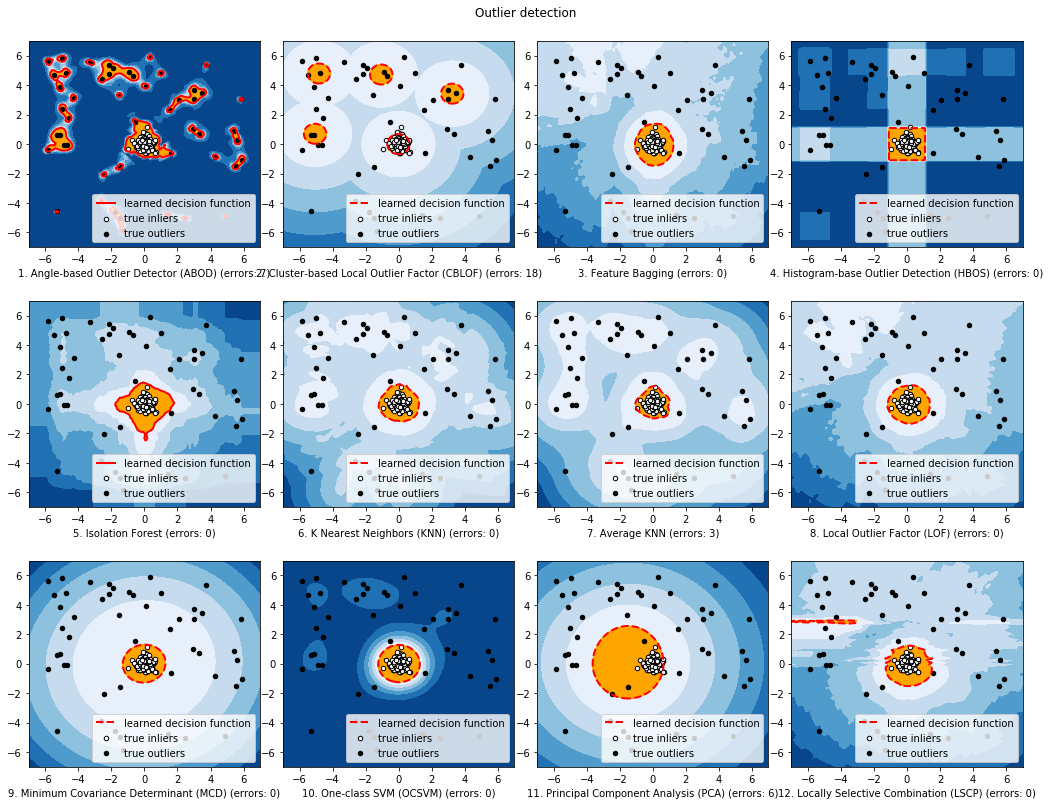

In [41]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 4, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()